## 1. Prepare Environments

* Îç∞Ïù¥ÌÑ∞ Ìè¥ÎçîÏùò Í≤ΩÎ°úÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
* ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º import Ìï©ÎãàÎã§.

In [ ]:
### ÌïúÍµ≠Ïñ¥ ÏÑ§Ïπò apt-get installÏóêÏÑú Error Î∞úÏÉù Ïãú, 'sudo' Î™ÖÎ†πÏñ¥ Ï∂îÍ∞ÄÌï¥ÏÑú root Í∂åÌïúÏúºÎ°ú Ïã§Ìñâ.
# !apt-get install fonts-nanum*
# !fc-cache -fv

In [8]:
# utils
import os
from dotenv import load_dotenv
import copy
import time
import logging
from tqdm import tqdm
import random
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',None) # ÎòêÎäî Ïà´Ïûê ÏßÄÏ†ï
pd.set_option('display.max_columns',None)

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf ÌååÏùº Ï†ÄÏû• Í≤ΩÎ°ú
    name='NanumBarunGothic' # Î≥ÑÏπ≠
)
fm.fontManager.ttflist.insert(0,fe)
plt.rcParams.update({'font.family' : 'NanumBarunGothic'}) # ÌïúÍ∏Ä Ìå®Ïπò
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False # ÏùåÏàò Î∂ÄÌò∏ Ïïà Íπ®ÏßÄÍ≤å

# Machine Learning
from sklearn.metrics import accuracy_score, f1_score

# Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import transforms
import timm
import torch.nn.init as init

# Image Augmentation
import albumentations as A
from albumentations.pytorch import ToTensorV2
from augraphy import *

### random seed Í≥†Ï†ï Ìï®Ïàò
def set_seed(seed: int = 42):
    """Î™®Îì† ÎûúÎç§ ÏãúÎìúÎ•º Í≥†Ï†ïÌï©ÎãàÎã§.

    :param int seed: Í≥†Ï†ïÌï† ÏãúÎìú Í∞í, defaults to 42
    """
    random.seed(seed)
    np.random.seed(seed)

    try:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # Î©ÄÌã∞ GPUÏö©
        
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
    except ImportError:
        pass  # torchÍ∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÏßÄ ÏïäÏúºÎ©¥ Î¨¥Ïãú

In [9]:
print("ÌòÑÏû¨ jupyter notebookÏùò Ïã§Ìñâ Í≤ΩÎ°ú:", os.getcwd())

ÌòÑÏû¨ jupyter notebookÏùò Ïã§Ìñâ Í≤ΩÎ°ú: /data/ephemeral/home/upstageailab-cv-classification-cv_5/codes/practice


In [10]:
timm.list_models(filter="resnet*", pretrained=True)

['resnet10t.c3_in1k',
 'resnet14t.c3_in1k',
 'resnet18.a1_in1k',
 'resnet18.a2_in1k',
 'resnet18.a3_in1k',
 'resnet18.fb_ssl_yfcc100m_ft_in1k',
 'resnet18.fb_swsl_ig1b_ft_in1k',
 'resnet18.gluon_in1k',
 'resnet18.tv_in1k',
 'resnet18d.ra2_in1k',
 'resnet26.bt_in1k',
 'resnet26d.bt_in1k',
 'resnet26t.ra2_in1k',
 'resnet32ts.ra2_in1k',
 'resnet33ts.ra2_in1k',
 'resnet34.a1_in1k',
 'resnet34.a2_in1k',
 'resnet34.a3_in1k',
 'resnet34.bt_in1k',
 'resnet34.gluon_in1k',
 'resnet34.tv_in1k',
 'resnet34d.ra2_in1k',
 'resnet50.a1_in1k',
 'resnet50.a1h_in1k',
 'resnet50.a2_in1k',
 'resnet50.a3_in1k',
 'resnet50.am_in1k',
 'resnet50.b1k_in1k',
 'resnet50.b2k_in1k',
 'resnet50.bt_in1k',
 'resnet50.c1_in1k',
 'resnet50.c2_in1k',
 'resnet50.d_in1k',
 'resnet50.fb_ssl_yfcc100m_ft_in1k',
 'resnet50.fb_swsl_ig1b_ft_in1k',
 'resnet50.gluon_in1k',
 'resnet50.ra_in1k',
 'resnet50.ram_in1k',
 'resnet50.tv2_in1k',
 'resnet50.tv_in1k',
 'resnet50_gn.a1h_in1k',
 'resnet50c.gluon_in1k',
 'resnet50d.a1_in1k',
 '

In [25]:
project_root = '/data/ephemeral/home/upstageailab-cv-classification-cv_5'
data_dir = os.path.join(project_root, 'data')
print("‚öôÔ∏è Data Directory Path:", data_dir)

device = 'cpu'
if torch.backends.mps.is_available():
    device = torch.device('mps')
elif torch.cuda.is_available():
    device = torch.device('cuda')
print("‚öôÔ∏è Device :",device)

from zoneinfo import ZoneInfo
from datetime import datetime
CURRENT_TIME = datetime.now(ZoneInfo("Asia/Seoul")).strftime("%y%m%d%H%M")
print(f"‚åö Ïã§Ìóò ÏãúÍ∞Ñ: {CURRENT_TIME}")

CFG = {
    'model_name': 'resnet50.a1_in1k', # timm model name
    'pretrained': True, # timm pretrained Í∞ÄÏ§ëÏπò ÏÇ¨Ïö© Ïó¨Î∂Ä
    'fine_tuning': "full", # fine-tuning Î∞©Î≤ïÎ°†
    # full : pretrained=True, pretrainedÍ∞ÄÏ§ëÏπòÎ•º Ï†ÑÎ∂Ä Ïû¨ÌïôÏäµÏãúÌÇ®Îã§. 
    # head : pretrained=True, model backbone Î∂ÄÎ∂ÑÏùÄ freezeÌïòÍ≥† head Î∂ÄÎ∂ÑÏùÑ Ïû¨ÌïôÏäµÏãúÌÇ®Îã§.
    # custom : pretrained=True, backboneÏóêÏÑúÎèÑ ÏùºÎ∂ÄÎ∂ÑÏùÑ Ïû¨ÌïôÏäµÏãúÌÇ®Îã§.
    # scratch : pretrained=False, Î™®Îç∏ Íµ¨Ï°∞Îßå ÏÇ¨Ïö©ÌïòÍ≥† Î™®Îì† Í∞ÄÏ§ëÏπòÎ•º Ï≤òÏùåÎ∂ÄÌÑ∞ ÌïôÏäµÏãúÌÇ®Îã§.
    # Loss Function
    'criterion': 'CrossEntropyLoss',
    # optimizer name: SGD, RMSprop, Momentum, NAG, Adam, AdamW, NAdam, RAdam, Adafactor
    # reference : https://www.notion.so/skier-song9/Pytorch-9cfee0520ed6468a94b024ea35e48018?source=copy_link#217c8d3f60f58044beeac55596433dc6
    'optimizer_name': 'AdamW', 
    'lr': 1e-2, # learning rate
    'weight_decay': 1e-4, # weight decay ratio
    # scheduler_name : StepLR, ExponentialLR, CosineAnnealingLR, OneCycleLR, ReduceLROnPlateau
    # reference : https://www.notion.so/skier-song9/Pytorch-9cfee0520ed6468a94b024ea35e48018?source=copy_link#1d2c8d3f60f58026b71ad399ead029a9
    'scheduler_name': 'OneCycleLR',
    
    # Í∏∞ÌÉÄ Î≥ÄÏàòÎì§
    'random_seed': 256, 
    'n_folds': 5, # validation set, cross-validation Ïãú foldÏùò Í∞úÏàò
    'val_split_ratio': 0.15, # train-val split ÎπÑÏú®
    'stratify': True, # validation set Î∂ÑÌï† Ïãú stratify Ï†ÑÎûµ ÏÇ¨Ïö© Ïó¨Î∂Ä
    'image_size': 224, # ÎßåÏïΩ multi-scale train/test Ïãú NoneÏúºÎ°ú ÏÑ§Ï†ï

    # normalization mean, std
    # full file tuning Ïãú 0.5Í∞Ä Ïú†Î¶¨
    # pre-trained Î™®Îç∏ ÏÇ¨Ïö© Ïãú pre-trained Î™®Îç∏Ïùò mean, stdÎ•º ÏÇ¨Ïö©
    'norm_mean': [0.5, 0.5, 0.5],
    'norm_std': [0.5, 0.5, 0.5],

    # Ï†ÅÏö©ÌïòÎäî Í∏∞Î≤ïÎì§ Î™ÖÏãú
    'augmentation': {},

    # Î™®Îç∏Ïóê ÎåÄÌïú hyperparameters
    'model_layer': {}, # model layerÏùò filter size, activation function, pooling layer Îì± Î≥ÄÍ≤Ω Ïãú ÏûëÏÑ±
    'dropout': 0.3, # model layerÏóêÏÑú dropout ÎπÑÏú® Î≥ÄÍ≤Ω Ïãú ÏûëÏÑ±
    'timm_activation': "ReLU",
    'activation': "SELU", # ReLU, LeakyReLU, ELU, SELU, GELU, Tanh, PReLU, SiLU

    # ÌïôÏäµ Ïãú hyperparameters
    'epochs': 10000, # max epoch
    'patience': 50, # early stopping patience
    'batch_size': 64,

    # device
    'device': device # device name
}
if CFG['patience'] < 5:
    raise ValueError("Ealry stopping patience must be larger than 5!")

# wandb setting
import wandb
wandb.login()
WB = False # wandb Í∏∞Î°ùÌï† Í±∞Î©¥ True, ÏïÑÎãàÎ©¥ False.
project_name = "upstage-img-clf"
# def get_runs(project_name):
#     # wandb projectÏùò runsÎì§ÏùÑ Í∞ÄÏ†∏Ïò¥
#     return wandb.Api().runs(path=project_name, order="-created_at")
# def get_latest_run(project_name):
#     runs = get_runs(project_name) # wandb projectÏùò runsÎì§ÏùÑ Í∞ÄÏ†∏Ïò¥
#     if not runs: # ÏµúÏ¥à runsÏóêÎäî project_name-001 Î°ú Ïù¥Î¶ÑÏùÑ ÎßåÎì†Îã§.
#         return f"{CFG['model_name']}-opt_{CFG['optimizer_name']}-img{CFG['image_size']}-aug_{len(CFG['augmentation'])}-{CURRENT_TIME}-0000"
#     return runs[0].name # Í∞ÄÏû• ÏµúÍ∑ºÏùò runs Ïù¥Î¶ÑÏùÑ Í∞ÄÏ†∏Ïò®Îã§.
# def auto_increment_run_suffix(name: str, pad=4):
#     suffix = name.split("-")[-1]
#     next_suffix = str(int(suffix) + 1).zfill(pad) # 2 > 0002
#     return name.replace(suffix, next_suffix)
# recent_run_name = get_latest_run(project_name)
# next_run_name = auto_increment_run_suffix(recent_run_name) # Í∞ÄÏû• ÏµúÍ∑º runsÏùò Ïà´ÏûêÎ•º 1 Ïò¨Î¶∞Îã§.
next_run_name = f"{CURRENT_TIME}-{CFG['model_name']}-opt_{CFG['optimizer_name']}-img{CFG['image_size']}-aug_{len(CFG['augmentation'])}"
print(f"üì¢ run name: {next_run_name}")
run = None
if WB:
    run = wandb.init(
        project=project_name,
        name=next_run_name,
        config=CFG
    )
    pass

# transform dictionary into namespace
from types import SimpleNamespace
CFG = SimpleNamespace(**CFG)

# set random seed
set_seed(CFG.random_seed)

‚öôÔ∏è Data Directory Path: /data/ephemeral/home/upstageailab-cv-classification-cv_5/data
‚öôÔ∏è Device : cuda
‚åö Ïã§Ìóò ÏãúÍ∞Ñ: 2507011029
üì¢ run name: 2507011029-resnet50.a1_in1k-opt_AdamW-img224-aug_0


In [26]:
# download data
# os.chdir(project_root)
# !wget https://aistages-api-public-prod.s3.amazonaws.com/app/Competitions/000356/data/data.tar.gz
# !tar -zxvf data.tar.gz

## 2. Import Library & Define Functions
* ÌïôÏäµ Î∞è Ï∂îÎ°†Ïóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î°úÎìúÌï©ÎãàÎã§.
* ÌïôÏäµ Î∞è Ï∂îÎ°†Ïóê ÌïÑÏöîÌïú Ìï®ÏàòÏôÄ ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌï©ÎãàÎã§.

In [27]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌï©ÎãàÎã§.
class ImageDataset(Dataset):
    # def __init__(self, csv, path, transform=None):
    def __init__(self, df:pd.DataFrame, path, transform=None):
        """
        :param pd.DataFrame df: train-valÏùÑ ÏúÑÌï¥ÏÑúÎäî pandas.DataframeÏúºÎ°ú Î∞õÏïÑÏïº Ìï®.
        :param str path: Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
        :param _type_ transform: Ïù¥ÎØ∏ÏßÄ Î≥ÄÌòï, defaults to None
        """
        self.df = df
        self.path = path
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        name, target = self.df.iloc[idx]
        img = np.array(Image.open(os.path.join(self.path, name)))
        if self.transform:
            img = self.transform(image=img)['image']
        return img, target

In [28]:
import copy

class EarlyStopping:
	def __init__(self, patience=5, min_delta=1e-6, restore_best_weights=True):
		self.patience = patience
		self.min_delta = min_delta
		self.restore_best_weights = restore_best_weights
		self.best_model_state_dict = None
		self.best_loss = None
		self.counter = 0
		self.status = ""
	
	def __call__(self, model, val_loss):
		if self.best_loss is None:
			#ÌòÑÏû¨Ïùò Î™®Îç∏Î°ú self.best_loss, self.best_model_state_dict ÏóÖÎç∞Ïù¥Ìä∏
			self.best_loss = val_loss
			self.best_model_state_dict = copy.deepcopy(model.state_dict())
		elif val_loss < self.best_loss - self.min_delta:
			#val_lossÍ∞Ä best_lossÎ≥¥Îã§ Ï¢ãÏùÑ Îïå > self.best_lossÏôÄ self.best_model ÏóÖÎç∞Ïù¥Ìä∏
			self.best_model_state_dict = copy.deepcopy(model.state_dict())
			self.best_loss = val_loss
			self.counter = 0
			self.status = f"Improvement found, counter reset to {self.counter}"
		else:
			#val_lossÍ∞Ä Îçî Ïïà Ï¢ãÏùÑ Îïå > patience Ï¶ùÍ∞ÄÌïòÍ≥† early stop Ïó¨Î∂Ä ÌôïÏù∏
			self.counter += 1
			self.status = f"No improvement in the last {self.counter} epochs"
			if self.counter >= self.patience: # ealy stop
				self.status = f"Early stopping triggered after {self.counter} epochs."
				if self.restore_best_weights and self.best_model_state_dict is not None:
					model.load_state_dict(self.best_model_state_dict)
					return True
		return False # end with no early stop
	
	def restore_best(self, model):
		if self.best_loss is not None and self.best_model_state_dict is not None:
			print(f"Restore model_state_dict of which best_loss: {self.best_loss:.6f}")
			model.load_state_dict(self.best_model_state_dict)
			return True
		return False

class TrainModule():
	def __init__(self, model: torch.nn.Module, criterion, optimizer, scheduler, train_loader, valid_loader, cfg: SimpleNamespace, verbose:int =50, run=None):
		'''
		model, criterion, scheduler, train_loader, valid_loader ÎØ∏Î¶¨ Ï†ïÏùòÌï¥ÏÑú Ï†ÑÎã¨
		cfg : es_patience, epochs Îì±Ïóê ÎåÄÌïú hyperparametersÎ•º namespace Í∞ùÏ≤¥Î°ú ÏûÖÎ†•
		'''
		required_attrs = ['scheduler_name','patience', 'epochs']
		for attr in required_attrs:
			assert hasattr(cfg, attr), f"AttributeError: There's no '{attr}' attribute in cfg."
		assert verbose > 1 and verbose < cfg.epochs, f"Logging frequency({verbose}) MUST BE smaller than EPOCHS({cfg.epochs}) and positive value."
		
		self.model = model
		self.criterion = criterion
		self.optimizer = optimizer
		self.scheduler = scheduler
		self.train_loader = train_loader
		self.valid_loader = valid_loader
		self.cfg = cfg
		if getattr(cfg, "device", False):
			self.model.to(self.cfg.device)
		else:
			self.cfg.device = 'cpu'
		self.es = EarlyStopping(patience=self.cfg.patience)
		### list for plot
		self.train_losses_for_plot, self.val_losses_for_plot = [], []
		self.train_acc_for_plot, self.val_acc_for_plot = [], [] # classification
		self.train_f1_for_plot, self.val_f1_for_plot = [], [] # classification
		# logging frequency
		self.verbose = verbose
		# wandb run object
		self.run = run
		
	def training_step(self):
		# set train mode
		self.model.train()
		running_loss = 0.0
		correct = 0 # classification
		total = 0
		all_preds = []
		all_targets = []
		
		for train_x, train_y in self.train_loader: # batch training
			train_x, train_y = train_x.to(self.cfg.device), train_y.to(self.cfg.device)
			
			self.optimizer.zero_grad() # Ïù¥Ï†Ñ gradient Ï¥àÍ∏∞Ìôî
			outputs = self.model(train_x)
			loss = self.criterion(outputs, train_y)
			
			loss.backward() # backward pass
			self.optimizer.step() # Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏
			if self.cfg.scheduler_name == "OneCycleLR":
				self.scheduler.step()
			
			running_loss += loss.item() * train_y.size(0) # train_loss 
			_, predicted = torch.max(outputs, 1) # Í∞ÄÏû• ÌôïÎ•† ÎÜíÏùÄ ÌÅ¥ÎûòÏä§ ÏòàÏ∏° # classification
			correct += (predicted == train_y).sum().item() # classification
			total += train_y.size(0) 

			all_preds.extend(predicted.cpu().numpy())
			all_targets.extend(train_y.cpu().numpy())
			
		epoch_loss = running_loss / total # average loss of 1 epoch
		epoch_acc = 100 * correct / total # classification
		epoch_f1 = f1_score(all_targets, all_preds, average='macro') # classification
		return epoch_loss, epoch_acc, epoch_f1  # classification		
	
	def validation_step(self):
		self.model.eval()  # ÌèâÍ∞Ä Î™®Îìú
		val_loss = 0
		correct = 0 # classification
		total = 0
		all_preds = []
		all_targets = []
		
		with torch.no_grad():  # gradient Í≥ÑÏÇ∞ ÎπÑÌôúÏÑ±Ìôî
			for val_x, val_y in self.valid_loader: # batch training
				val_x, val_y = val_x.to(self.cfg.device), val_y.to(self.cfg.device)
				
				outputs = self.model(val_x)
				loss = self.criterion(outputs, val_y)
								
				val_loss += loss.item() * val_y.size(0)
				_, predicted = torch.max(outputs, 1) # classification
				correct += (predicted == val_y).sum().item() # classification
				total += val_y.size(0)

				all_preds.extend(predicted.cpu().numpy())
				all_targets.extend(val_y.cpu().numpy())
		
		epoch_loss = val_loss / total # average loss of 1 epoch
		epoch_acc = 100 * correct / total # classification
		epoch_f1 = f1_score(all_targets, all_preds, average='macro') # classification
		return epoch_loss, epoch_acc, epoch_f1 # classification
	
	def training_loop(self):
		try:
			# reset loss list for plots
			self.train_losses_for_plot, self.val_losses_for_plot = [], []
			self.train_acc_for_plot, self.val_acc_for_plot = [], []
			epoch_counter = 0
			epoch_timer = []
			done = False
			
			pbar = tqdm(total=self.cfg.epochs)
			while not done and epoch_counter<self.cfg.epochs:
				st = time.time()
				epoch_counter += 1
				
				# train
				# train_loss = self.training_step() # regression
				train_loss, train_acc, train_f1 = self.training_step() # classification
				
				self.train_losses_for_plot.append(train_loss)
				self.train_acc_for_plot.append(train_acc) # classification
				self.train_f1_for_plot.append(train_f1) # classification
				
				# validation
				# val_loss = self.validation_step() # regression
				val_loss, val_acc, val_f1 = self.validation_step()  # classification
				self.val_losses_for_plot.append(val_loss)
				self.val_acc_for_plot.append(val_acc) # classification
				self.val_f1_for_plot.append(val_f1) # classification

				
				# schedulerÏùò Ï¢ÖÎ•òÏóê Îî∞Îùº val_lossÎ•º Ï†ÑÎã¨ÌïòÍ±∞ÎÇò Í∑∏ÎÉ• step() Ìò∏Ï∂ú.
				if self.cfg.scheduler_name == "OneCycleLR":
					pass
				elif self.cfg.scheduler_name == "ReduceLROnPlateau":
					self.scheduler.step(val_loss)
				else:
					self.scheduler.step()
				epoch_timer.append(time.time() - st)
				pbar.update(1)
				if self.es(self.model, val_loss):
					# early stopped Îêú Í≤ΩÏö∞ if Î¨∏ ÏïàÏúºÎ°ú Îì§Ïñ¥Ïò®Îã§.
					done = True
				if self.run is not None:
					print('wandb logging...')
					epoch_log = {
						'train_loss': train_loss,
						'train_accuracy': train_acc,
						'train_f1': train_f1,
						'val_loss': val_loss,
						'val_accuracy': val_acc,
						'val_f1': val_f1
					}
					run.log(epoch_log, step=epoch_counter) # wandb logging
				if epoch_counter == 1 or epoch_counter % self.verbose == 0:
					# self.verbose epochÎßàÎã§ logging
					mean_time_spent = np.mean(epoch_timer)
					epoch_timer = [] # reset timer list
					# print(f"Epoch {epoch_counter}/{self.cfg.epochs} [Time: {mean_time_spent:.2f}s], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.8f}")
					print(f"Epoch {epoch_counter}/{self.cfg.epochs} [Time: {mean_time_spent:.2f}s], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.8f}\n Train ACC: {train_acc:.2f}%, Validation ACC: {val_acc:.2f}%\n Train F1: {train_f1:.4f}, Validation F1: {val_f1:.4f}") # classification
		except Exception as e:
			print(e)
			return False # training loop failed
		return True # training loop succeed
		
	def plot_loss(self, show:bool=False, savewandb:bool=True, savedir:str=None):
		"""loss, accuracy, f1-scoreÏóê ÎåÄÌïú Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî Ìï®Ïàò

		:param bool show: plt.show()Î•º Ïã§ÌñâÌï† Í±¥ÏßÄ, defaults to False
		:param bool savewandb: wandb loggingÏóê plotÏùÑ ÏãúÍ∞ÅÌôîÌïòÏó¨ Ï†ÄÏû•Ìï† Í±¥ÏßÄ, defaults to True
		:param str savedir: plotÏùÑ Ï†ÄÏû•Ìï† ÎîîÎ†âÌÜ†Î¶¨Î•º ÏÑ§Ï†ï, NoneÏù¥Î©¥ Ï†ÄÏû• Ïïà Ìï®, defaults to None
		:return _type_: None
		"""
		import matplotlib.pyplot as plt
		fig, ax = plt.subplots(figsize=(6, 4))
		plt.plot(range(len(self.train_losses_for_plot)),self.train_losses_for_plot,color='blue',label='train_loss')
		plt.plot(range(len(self.val_losses_for_plot)),self.val_losses_for_plot,color='red',label='val_loss')
		plt.axhline(y=1e-3, color='red', linestyle='--', label='(Overfit)')
		plt.legend()
		plt.xlabel("Epoch")
		plt.ylabel("Loss")
		plt.title("Train/Validation Loss plot")
		if savedir is not None:
			if os.path.exists(savedir):
				os.makedirs(savedir, exist_ok=True)
			savepath = os.path.join(savedir, "loss_plot.png")
			plt.savefig(savepath)
			print(f"‚öôÔ∏èloss plot saved in {savepath}")
		if show:
			plt.show()
		if savewandb and self.run is not None:
			run.log({'loss_plot': wandb.Image(fig)}) # wandb
		plt.clf()
		
		# classification
		fig, ax = plt.subplots(figsize=(6, 4))
		plt.plot(range(len(self.train_acc_for_plot)),self.train_acc_for_plot,color='blue',label='train_acc')
		plt.plot(range(len(self.val_acc_for_plot)),self.val_acc_for_plot,color='red',label='val_acc')
		plt.axhline(y=99.0, color='red', linestyle='--', label='(99%)')
		plt.legend()
		plt.xlabel("Epoch")
		plt.ylabel("Accuracy(%)")
		plt.title("Train/Validation Accuracy Plot")
		plt.grid()
		if savedir is not None:
			savepath = os.path.join(savedir, "accuracy_plot.png")
			plt.savefig(savepath)
			print(f"‚öôÔ∏èaccuracy plot saved in {savepath}")
		if show:
			plt.show()
		if savewandb and self.run is not None:
			run.log({'accuracy_plot': wandb.Image(fig)}) # wandb
		plt.clf()

		# classification
		fig, ax = plt.subplots(figsize=(6, 4))
		plt.plot(range(len(self.train_f1_for_plot)),self.train_f1_for_plot,color='blue',label='train_f1')
		plt.plot(range(len(self.val_f1_for_plot)),self.val_f1_for_plot,color='red',label='val_f1')
		plt.axhline(y=0.99, color='red', linestyle='--', label='(0.99)')
		plt.legend()
		plt.xlabel("Epoch")
		plt.ylabel("F1-score")
		plt.title("Train/Validation F1-score Plot")
		plt.grid()
		if savedir is not None:
			savepath = os.path.join(savedir, "f1_plot.png")
			plt.savefig(savepath)
			print(f"‚öôÔ∏èf1 plot saved in {savepath}")
		if show:
			plt.show()
		if savewandb and self.run is not None:
			run.log({'f1_plot': wandb.Image(fig)}) # wandb
		plt.clf()
		return None
		
	def save_experiments(self, savepath=None):
		""""""
		save_dict = {
			'model_state_dict': self.model.state_dict(),
			'optimizer_state_dict': self.optimizer.state_dict(),
			'scheduler_state_dict': self.scheduler.state_dict(),
			'cfg': vars(self.cfg) # ÎÇòÏ§ëÏóê Î°úÎìúÌï¥ÏÑú CFG = SimpleNamespace(**cfg)Î°ú Î≥µÏõê
		}
		if savepath is not None:
			dirpath = os.path.dirname(savepath)
			if os.path.exists(dirpath):
				os.makedirs(dirpath, exist_ok=True)
			torch.save(save_dict, f=savepath)
			return True
		return False
		

## 3. Load Data & Augmentation
* ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Î°úÎçîÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
* Ïù¥ÎØ∏ÏßÄ Ï¶ùÍ∞ï Í∏∞Î≤ïÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.

> references   
> - torchvision ÏßÅÏ†ë Íµ¨ÌòÑ : [ÏòàÏãú ÏΩîÎìú](https://skier-song9.notion.site/CustomDataset-Augmentation-1d1c8d3f60f58026b4def1895f3fb9b0?source=copy_link)   
> - Albumentation : [ÏòàÏãú ÏΩîÎìú](https://albumentations.ai/docs/examples/)   
> - Augraphy : [ÏòàÏãú ÏΩîÎìú](https://augraphy.readthedocs.io/en/latest/doc/source/example_usage.html), [PyTorch ÌîÑÎ°úÏÑ∏Ïä§ÏóêÏÑú ÏÇ¨Ïö© Î∞©Î≤ï](https://augraphy.readthedocs.io/en/latest/examples/pytorch_integration_classification_example.html)

In [29]:
album_basic_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=CFG.image_size),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=360, p=1),
        A.RandomCrop(height=CFG.image_size, width=CFG.image_size),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=1),
        A.RandomBrightnessContrast(p=1),
        A.Normalize(mean=CFG.norm_mean, std=CFG.norm_mean),
        ToTensorV2(),
    ],
)

In [30]:
# augmentationÏùÑ ÏúÑÌïú transform ÏΩîÎìú
train_transform = A.Compose([
    # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï°∞Ï†ï
    A.Resize(height=CFG.image_size, width=CFG.image_size),
    # images normalization
    A.Normalize(mean=CFG.norm_mean, std=CFG.norm_std),
    # numpy Ïù¥ÎØ∏ÏßÄÎÇò PIL Ïù¥ÎØ∏ÏßÄÎ•º PyTorch ÌÖêÏÑúÎ°ú Î≥ÄÌôò
    ToTensorV2(),
])

# valid, test image Î≥ÄÌôòÏùÑ ÏúÑÌïú transform ÏΩîÎìú
test_transform = A.Compose([
    A.Resize(height=CFG.image_size, width=CFG.image_size),
    A.Normalize(mean=CFG.norm_mean, std=CFG.norm_std),
    ToTensorV2(),
])

#### Train-Validation Î∂ÑÌï†

In [31]:
# train-validation split
### TO-DO
from sklearn.model_selection import train_test_split
train_df = pd.read_csv(os.path.join(data_dir, "train.csv"))
train_idx, val_idx = train_test_split(
    range(len(train_df)),
    test_size=CFG.val_split_ratio,
    stratify=train_df['target'],
    shuffle=True,
    random_state=CFG.random_seed
)
print(len(train_idx), len(val_idx))

# Create train and validation CSV files temporarily
train_subset = train_df.iloc[train_idx].reset_index(drop=True)
val_subset = train_df.iloc[val_idx].reset_index(drop=True)


1334 236


#### Dataset Î∞è DataLoader Ï†ïÏùò

In [32]:
# Dataset Ï†ïÏùò
train_dataset = ImageDataset(
    train_subset,
    os.path.join(data_dir, "train"),
    transform=train_transform
)

# Augmented Dataset Ï†ïÏùò
album_basic_dataset = ImageDataset(
    train_subset,
    os.path.join(data_dir, "train"),
    transform=album_basic_transform
)

# Concat Train Datasets
combined_dataset = ConcatDataset(
    [train_dataset, album_basic_dataset]
)


valid_dataset = ImageDataset(
    val_subset,
    os.path.join(data_dir, "train"),
    transform=test_transform
)

test_dataset = ImageDataset(
    pd.read_csv(os.path.join(data_dir, "sample_submission.csv")),
    os.path.join(data_dir, "test"),
    transform=test_transform
)
print(len(train_dataset), len(valid_dataset), len(test_dataset))

1334 236 3140


In [33]:
# DataLoader Ï†ïÏùò
train_loader = DataLoader(
    combined_dataset,
    batch_size=CFG.batch_size,
    shuffle=True,
    num_workers=4,
    pin_memory=True,
    drop_last=False
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=CFG.batch_size,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=CFG.batch_size,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

In [34]:
for train_x, train_y in train_loader:
    print(train_x.shape)
    break

torch.Size([64, 3, 224, 224])


## 5. Train Model
* Î™®Îç∏ÏùÑ Î°úÎìúÌïòÍ≥†, ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [35]:
def get_activation(CFG):
    ACTIVATIONS = {
        'ReLU': nn.ReLU, # ÏùåÏàòÎäî 0ÏúºÎ°ú, ÏñëÏàòÎäî ÏÑ†ÌòïÌï®Ïàò
        'LeakyReLU': nn.LeakyReLU, # ÏùåÏàòÎèÑ ÏùºÎ∂Ä ÌÜµÍ≥º -> Dead ReLU Î∞©ÏßÄ
        'ELU': nn.ELU, # ÏùåÏàòÎèÑ ÏùºÎ∂Ä ÌÜµÍ≥º ‚Üí Ï∂úÎ†• ÌèâÍ∑†Ïù¥ 0Ïóê Í∞ÄÍπùÎèÑÎ°ù Ìï®ÏúºÎ°úÏç® ÌïôÏäµ ÏïàÏ†ïÌôî ÎèÑÏõÄ
        'SELU': nn.SELU, # ELUÏóê Ïä§ÏºÄÏùºÎßÅ Í≥ÑÏàòÎ•º Í≥±Ìï¥ Ïã†Í≤ΩÎßùÏùÑ ÏûêÍ∏∞ Ï†ïÍ∑úÌôî, ÌäπÏ†ï Ï°∞Í±¥ (Ïòà: fully connected, ÌäπÏ†ï Ï¥àÍ∏∞Ìôî, ÌäπÏ†ï Íµ¨Ï°∞)ÏóêÏÑúÎßå ÏûêÍ∏∞ Ï†ïÍ∑úÌôî Ìö®Í≥ºÍ∞Ä Ïûò Î∞úÌúò
        'GELU': nn.GELU, # Îçî Î∂ÄÎìúÎü¨Ïö¥ ÎπÑÏÑ†ÌòïÏÑ±, Transformer, BERTÎ•ò
        'Tanh': nn.Tanh, # ÏôÑÎßåÌïú sigmoid
        'PReLU': nn.PReLU, # ÏùåÏàòÎèÑ ÏùºÎ∂Ä ÌÜµÍ≥º -> Dead ReLU Î∞©ÏßÄ, Í∏∞Ïö∏Í∏∞Î•º ÌïôÏäµÌï®.
        'SiLU': nn.SiLU, # Îçî Î∂ÄÎìúÎü¨Ïö¥ ÎπÑÏÑ†ÌòïÏÑ±, EfficientNet, Swin Transformer Îì±
    }
    return ACTIVATIONS[CFG.activation]

class TimmWrapper(nn.Module):
    def __init__(self, CFG):
        super().__init__()
        self.backbone = timm.create_model(
            model_name=CFG.model_name,
            pretrained=CFG.pretrained,
            num_classes=0, global_pool='avg'
        )
        self.dropout = nn.Dropout(p=CFG.dropout)
        self.activation = get_activation(CFG)()
        self.classifier = nn.Sequential(
            nn.Linear(self.backbone.num_features, 1000),
            nn.BatchNorm1d(1000),
            self.activation,
            self.dropout,
            nn.Linear(1000, 17)
        )
        def weight_init(m):
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                if CFG.timm_activation in ['Tanh']:
                    # Xavier Ï¥àÍ∏∞Ìôî
                    init.xavier_uniform_(m.weight)
                else:
                    # He Ï¥àÍ∏∞Ìôî
                    init.kaiming_uniform_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm1d) or isinstance(m, nn.BatchNorm2d):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)
        if CFG.fine_tuning == 'head':
            # backbone ÌååÎùºÎØ∏ÌÑ∞Î•º freeze
            for param in self.backbone.parameters():
                param.requires_grad = False
            # classifierÎäî Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî
            self.classifier.apply(weight_init)
        elif CFG.fine_tuning == 'custom':
            # ÏßÅÏ†ë Ïª§Ïä§ÌÑ∞ÎßàÏù¥Ïßï
            pass
        elif CFG.fine_tuning == 'scratch':
            self.apply(weight_init)

    def forward(self, x):
        x = self.backbone(x)
        x = self.dropout(x)
        x = self.classifier(x)
        return x

def get_timm_model(CFG):
    if CFG.dropout is not None:
        return TimmWrapper(CFG).to(CFG.device)

    return timm.create_model(
        CFG.model_name,
        pretrained=CFG.pretrained,
        num_classes=17,
        act_layer=CFG.timm_activation # activation function ÏÑ§Ï†ï (pretrained=TrueÎùºÎ©¥ pretrainedÏùò activationÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÎã§.)
    ).to(CFG.device)

def get_criterion(CFG):
    CRITERIONS = {
        "CrossEntropyLoss" : nn.CrossEntropyLoss()
    }
    return CRITERIONS[CFG.criterion]

def get_optimizers(model, CFG):
    # SGD, RMSprop, Momentum, NAG, Adam, AdamW, NAdam, RAdam, Adafactor
    OPTIMIZERS = {
        'SGD': optim.SGD(model.parameters(), lr=CFG.lr),
        'RMSprop': optim.RMSprop(model.parameters(), lr=CFG.lr, alpha=0.99, weight_decay=CFG.weight_decay),
        'Momentum': optim.SGD(model.parameters(), lr=CFG.lr, momentum=0.9),
        'NAG' : optim.SGD(model.parameters(), lr=CFG.lr, momentum=0.9, nesterov=True),
        'Adam' : optim.Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay),
        'AdamW': optim.AdamW(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay),
        'NAdam': optim.NAdam(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay, momentum_decay=4e-3),
        'RAdam': optim.RAdam(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay),
        'Adafactor': optim.Adafactor(model.parameters(), lr=CFG.lr, beta2_decay=-0.8, d=1.0, weight_decay=CFG.weight_decay, maximize=False)
    }
    return OPTIMIZERS[CFG.optimizer_name]

def get_scheduler(optimizer, CFG):
    # StepLR, ExponentialLR, CosineAnnealingLR, OneCycleLR, ReduceLROnPlateau
    SCHEDULERS = {
        'StepLR': lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1),
        'ExponentialLR': lr_scheduler.ExponentialLR(optimizer, gamma=0.95),
        'CosineAnnealingLR': lr_scheduler.CosineAnnealingLR(optimizer, T_max=CFG.epochs, eta_min=0),
        'OneCycleLR': lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=CFG.epochs),
        'ReduceLROnPlateau': lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=CFG.patience-5, min_lr=0),
    }
    return SCHEDULERS[CFG.scheduler_name]

In [36]:
# load model
model = get_timm_model(CFG)

criterion = get_criterion(CFG)

# define optimizer
# SGD, RMSprop, Momentum, NAG, Adam, AdamW, NAdam, RAdam, Adafactor
optimizer = get_optimizers(model, CFG)

# define scheduler
# StepLR, ExponentialLR, CosineAnnealingLR, OneCycleLR, ReduceLROnPlateau
scheduler = get_scheduler(optimizer, CFG)


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [37]:
trainer = TrainModule(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    train_loader=train_loader,
    valid_loader=valid_loader,
    cfg=CFG,
    verbose=15,
    run=run
)

In [38]:
trainer.model

TimmWrapper(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05,

In [39]:
# wandb watch >> layerÍ∞Ä ÍπäÏúºÎ©¥ Ïñ¥Ï∞®Ìîº ÏãúÍ∞ÅÌôîÌï¥ÏÑú Î≥¥Í∏∞ Ïñ¥Î†§ÏõÄ;;
# if WB:
#     run.watch(
#         models=trainer.model,
#         criterion=trainer.criterion,
#         log='all',
#         log_graph=True
#     )
# run train
trainer.training_loop()

  0%|          | 1/10000 [00:07<21:02:14,  7.57s/it]

Epoch 1/10000 [Time: 7.57s], Train Loss: 1.1259, Validation Loss: 0.48225670
 Train ACC: 63.64%, Validation ACC: 86.44%
 Train F1: 0.5988, Validation F1: 0.8376


  0%|          | 15/10000 [01:46<19:41:24,  7.10s/it]

Epoch 15/10000 [Time: 7.07s], Train Loss: 0.0780, Validation Loss: 0.22251858
 Train ACC: 97.56%, Validation ACC: 93.64%
 Train F1: 0.9737, Validation F1: 0.9332


  0%|          | 30/10000 [03:33<19:41:53,  7.11s/it]

Epoch 30/10000 [Time: 7.10s], Train Loss: 0.0350, Validation Loss: 0.25662317
 Train ACC: 98.91%, Validation ACC: 92.80%
 Train F1: 0.9893, Validation F1: 0.9288


  0%|          | 45/10000 [05:19<19:36:54,  7.09s/it]

Epoch 45/10000 [Time: 7.10s], Train Loss: 0.0203, Validation Loss: 0.46537054
 Train ACC: 99.29%, Validation ACC: 91.53%
 Train F1: 0.9914, Validation F1: 0.9161


  1%|          | 57/10000 [06:45<19:37:27,  7.11s/it]


True

# 6. Inference & Save File
* ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú Ï∂îÎ°†ÏùÑ ÏßÑÌñâÌïòÍ≥†, Í≤∞Í≥º ÌååÏùºÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.

In [40]:
### Ï†ÄÏû•Îêú trainerÎ•º Î°úÎìúÌïòÏó¨ Ï∂îÎ°†ÌïòÎäî Í≤ΩÏö∞ ÏïÑÎûò Ìï®ÏàòÎ°ú Î°úÎìú
def load_checkpoint_model(savepath=None):
    if os.path.exists(savepath):
        checkpoint = torch.load(savepath)
        cfg = SimpleNamespace(**checkpoint['cfg'])
        model = get_timm_model(cfg)
        model.load_state_dict(checkpoint['model_state_dict'])
        return model, cfg
    else:
        return None
    
# model, cfg = load_checkpoint_model(
#     savepath=os.path.join(project_root,'models','resnetrs101.tf_in1k-opt_Adam-img224-aug_0-2506301324-0001.pth')
# )

In [41]:
preds_list = []

trainer.model.eval()
for image, _ in tqdm(test_loader):
    image = image.to(device)

    with torch.no_grad():
        preds = trainer.model(image)
    preds_list.extend(preds.argmax(dim=1).detach().cpu().numpy())

### checkpointÎ°ú Î°úÎìúÌïú Î™®Îç∏Î°ú Ï∂îÎ°†ÌïòÎäî Í≤ΩÏö∞
# model.eval()
# for image, _ in tqdm(test_loader):
#     image = image.to(device)

#     with torch.no_grad():
#         preds = model(image)
#     preds_list.extend(preds.argmax(dim=1).detach().cpu().numpy())    

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:14<00:00,  3.47it/s]


In [42]:
pred_df = pd.DataFrame(test_dataset.df, columns=['ID', 'target'])
pred_df['target'] = preds_list

In [43]:
sample_submission_df = pd.read_csv(os.path.join(data_dir, "sample_submission.csv"))
assert (sample_submission_df['ID'] == pred_df['ID']).all(), "pred_dfÏóêÏÑú test Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏïÑÎãå Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§."
assert set(pred_df['target']).issubset(set(range(17))), "target Ïª¨ÎüºÏóê 0~16 Ïô∏Ïùò Í∞íÏù¥ ÏûàÏäµÎãàÎã§."

In [44]:
print(f'Ï†ÄÏû•Ìï† Submission ÌååÏùº Ïù¥Î¶Ñ: {next_run_name}.csv')

Ï†ÄÏû•Ìï† Submission ÌååÏùº Ïù¥Î¶Ñ: 2507011029-resnet50.a1_in1k-opt_AdamW-img224-aug_0.csv


In [45]:
### submission ÌååÏùº Ï†ÄÏû•
pred_df.to_csv(os.path.join(data_dir, 'submissions', f'{next_run_name}.csv'), index=False)

In [46]:
### trainer Ï†ÄÏû•
trainer_savepath = os.path.join(project_root, "models", f"{next_run_name}.pth")
trainer.save_experiments(savepath=trainer_savepath)

True

## 7. ÌïôÏäµ loss plot & Ï∂îÎ°† Í≤∞Í≥º ÌôïÏù∏

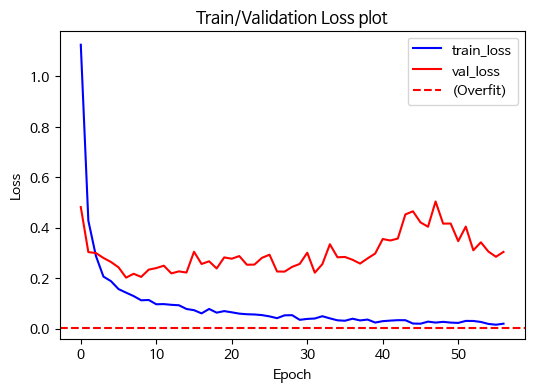

<Figure size 640x480 with 0 Axes>

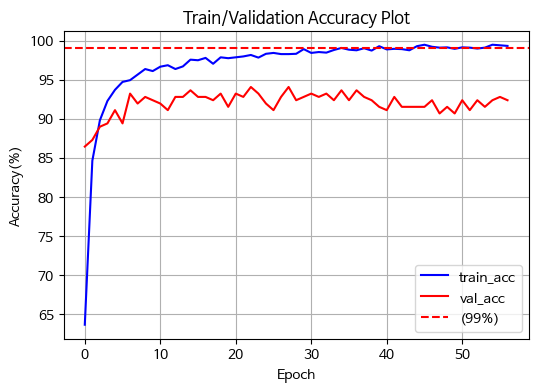

<Figure size 640x480 with 0 Axes>

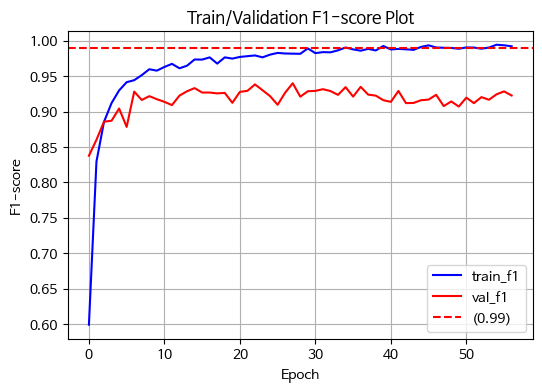

<Figure size 640x480 with 0 Axes>

In [47]:
# loss, accuracy, f1 plot ÏãúÍ∞ÅÌôî & wandb Ï†ÄÏû•
trainer.plot_loss(
    show=True,
    savewandb=True,
    savedir=None # Ï†ÄÏû• Ïïà Ìï®
)

In [48]:
display(pred_df[pred_df['ID']=='0a4f2decf34d3bff.jpg'])
display(pred_df[pred_df['ID']=='0a12d28777501f71.jpg'])
display(pred_df[pred_df['ID']=='0b60e9d39b43e0b9.jpg'])

ID  target
111  0a4f2decf34d3bff.jpg       2

ID  target
108  0a12d28777501f71.jpg      16

ID  target
126  0b60e9d39b43e0b9.jpg       4

## 8. WandB Finish

In [27]:
run.finish()

'resnetrs101.tf_in1k-opt_Adam-img224-aug_0-2507010210-0002'